# 선형 회귀
### 공부 시간에 따른 시험 점수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [27]:
# 데이터 불러오기
dataset = pd.read_csv('LinearRegressionData.csv')

dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [18]:
# 데이터 추출 iloc[row, col]
X = dataset.iloc[:, :-1].values #hour
y = dataset.iloc[:, -1].values #score

# X, y
print('X type: ',type(X))
print(X)
print('y type: ',type(y))
print(y)

X type:  <class 'numpy.ndarray'>
[[ 0.5]
 [ 1.2]
 [ 1.8]
 [ 2.4]
 [ 2.6]
 [ 3.2]
 [ 3.9]
 [ 4.4]
 [ 4.5]
 [ 5. ]
 [ 5.3]
 [ 5.8]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.9]
 [ 7.2]
 [ 8.4]
 [ 8.6]
 [10. ]]
y type:  <class 'numpy.ndarray'>
[ 10   8  14  26  22  30  42  48  38  58  60  72  62  68  72  58  76  86
  90 100]


In [15]:
from sklearn.linear_model import LinearRegression as lr

reg = lr() # 학습할 객체 생성
reg.fit(X, y) # X, y 데이터를 통해 학습을 하여 모델을 생성

LinearRegression()

In [16]:
y_pred = reg.predict(X) # X에 대한 y 예측값

# y 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

Text(0, 0.5, 'score')

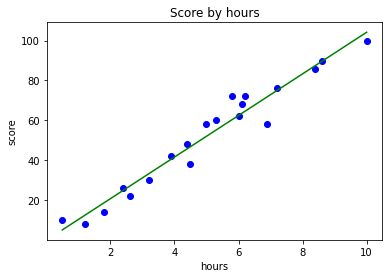

In [20]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, y_pred, color='green') # 선 그래프, X, 
plt.title('Score by hours') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # y축 이름

In [24]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]]))

9시간 공부했을 때 예상 점수 :  [313.09242351]


In [46]:
# y = mx + b
print('기울기(m): ', reg.coef_) # 기울기 m
print('y 절편(b): ', reg.intercept_) # y 절편 b

기울기(m):  [10.44369694]
y 절편(b):  -0.218484702867201


### 데이터 세트 분리
#### 테스트 데이터 7 or 8, 훈련 데이터 3 or 2

In [29]:
dataset2 = pd.read_csv('LinearRegressionData.csv')
dataset2

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [31]:
X2 = dataset2.iloc[:, :-1].values
y2 = dataset2.iloc[:, -1].values

In [32]:
from sklearn.model_selection import train_test_split as tts

# 훈련 세트, 테스트 세트 4개로 데이터를 나눔
# 훈련 세트를 80% 테스트 세트를 20% 로 함
X_train, X_test, y_train, y_test = tts(X2, y2, test_size=0.2, random_state=0)

In [36]:
# 훈련 세트, 테스트 세트 분류 데이터 확인
print(X_train, len(X_train))
print(X_test, len(X_test))

[[5.3]
 [8.4]
 [3.9]
 [6.1]
 [2.6]
 [1.8]
 [3.2]
 [6.2]
 [5. ]
 [4.4]
 [7.2]
 [5.8]
 [2.4]
 [0.5]
 [6.9]
 [6. ]] 16
[[ 8.6]
 [ 1.2]
 [10. ]
 [ 4.5]] 4


### 분리된 데이터를 통한 모델링

Text(0, 0.5, 'score')

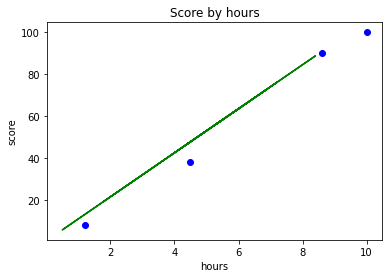

In [43]:
reg2 = lr()

reg2.fit(X_train, y_train)
y2_pred = reg2.predict(X_train)

plt.scatter(X_test, y_test, color='blue') # 테스트 세트
plt.plot(X_train, y2_pred, color='green') # 훈련 세트 선 
plt.title('Score by hours') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # y축 이름


In [48]:
print('선형 회귀를 통한 y 예측값: ', reg2.predict(X_test)) # 선형 회귀를 통한 예측값
print('y 실제값: ', y_test) # 실제 값

선형 회귀를 통한 y 예측값:  [ 90.83942755  13.20149182 105.52768566  47.82381451]
y 실제값:  [ 90   8 100  38]


In [47]:
# y = mx + b
print('기울기(m): ', reg2.coef_) # 기울기 m
print('y 절편(b): ', reg2.intercept_) # y 절편 b

기울기(m):  [10.49161294]
y 절편(b):  0.6115562905169369


### 모델 평가

In [52]:
# 테스트 세트를 통한 모델 평가, 0~1 사이의 값을 가짐
print('훈련 세트를 통한 모델 평가: ', reg2.score(X_train, y_train) * 100)
print('테스트 세트를 통한 모델 평가: ', reg2.score(X_test, y_test) * 100)

훈련 세트를 통한 모델 평가:  93.56663661221668
테스트 세트를 통한 모델 평가:  97.27616474310156
